In [25]:
import numpy as np
import pandas as pd

from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
# function helpers
unique_labels = [ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]

def preprocess_image(x):
    
    """
    we know that the pixcel values lies between 0-255 but it is obsearved that models performs exceptionally well if we scale pixel values
    between 0-1"""
    x = x/255 # normalize the data
    x = x.reshape(-1,28,28,1) # convert it into 28 x 28 gray scaled image
    
    return x


def predictions_to_labels(pred):
    labels =[]
    for p in pred:
        labels.append(unique_labels[np.argmax(p)])
    return labels

# Data processing

In [35]:
train_df = pd.read_csv("/home/iyeszin/Documents/sl_recognizer/dataset/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/home/iyeszin/Documents/sl_recognizer/dataset/sign_mnist_test/sign_mnist_test.csv")

In [36]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [37]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [38]:
train_x = preprocess_image(train_df.values)
test_x = preprocess_image(test_df.values)

# Evaluation

In [39]:
MODEL_NAME = "/home/iyeszin/Documents/ros_sign_language_recognition/ros_sign_language_recognition/weight/cnn_model.h5"

In [40]:
model = keras.models.load_model(MODEL_NAME, compile = False)

In [41]:
predictions = model.predict(test_x)

225/225 [==============================] - 1s 3ms/step


In [42]:
y_pred_labels = predictions_to_labels(predictions)
y_test_labels = predictions_to_labels(y_test)

In [43]:
accuracy_score(y_test_labels,y_pred_labels)

1.0

In [44]:
cm = confusion_matrix(y_test_labels,y_pred_labels)

<AxesSubplot:>

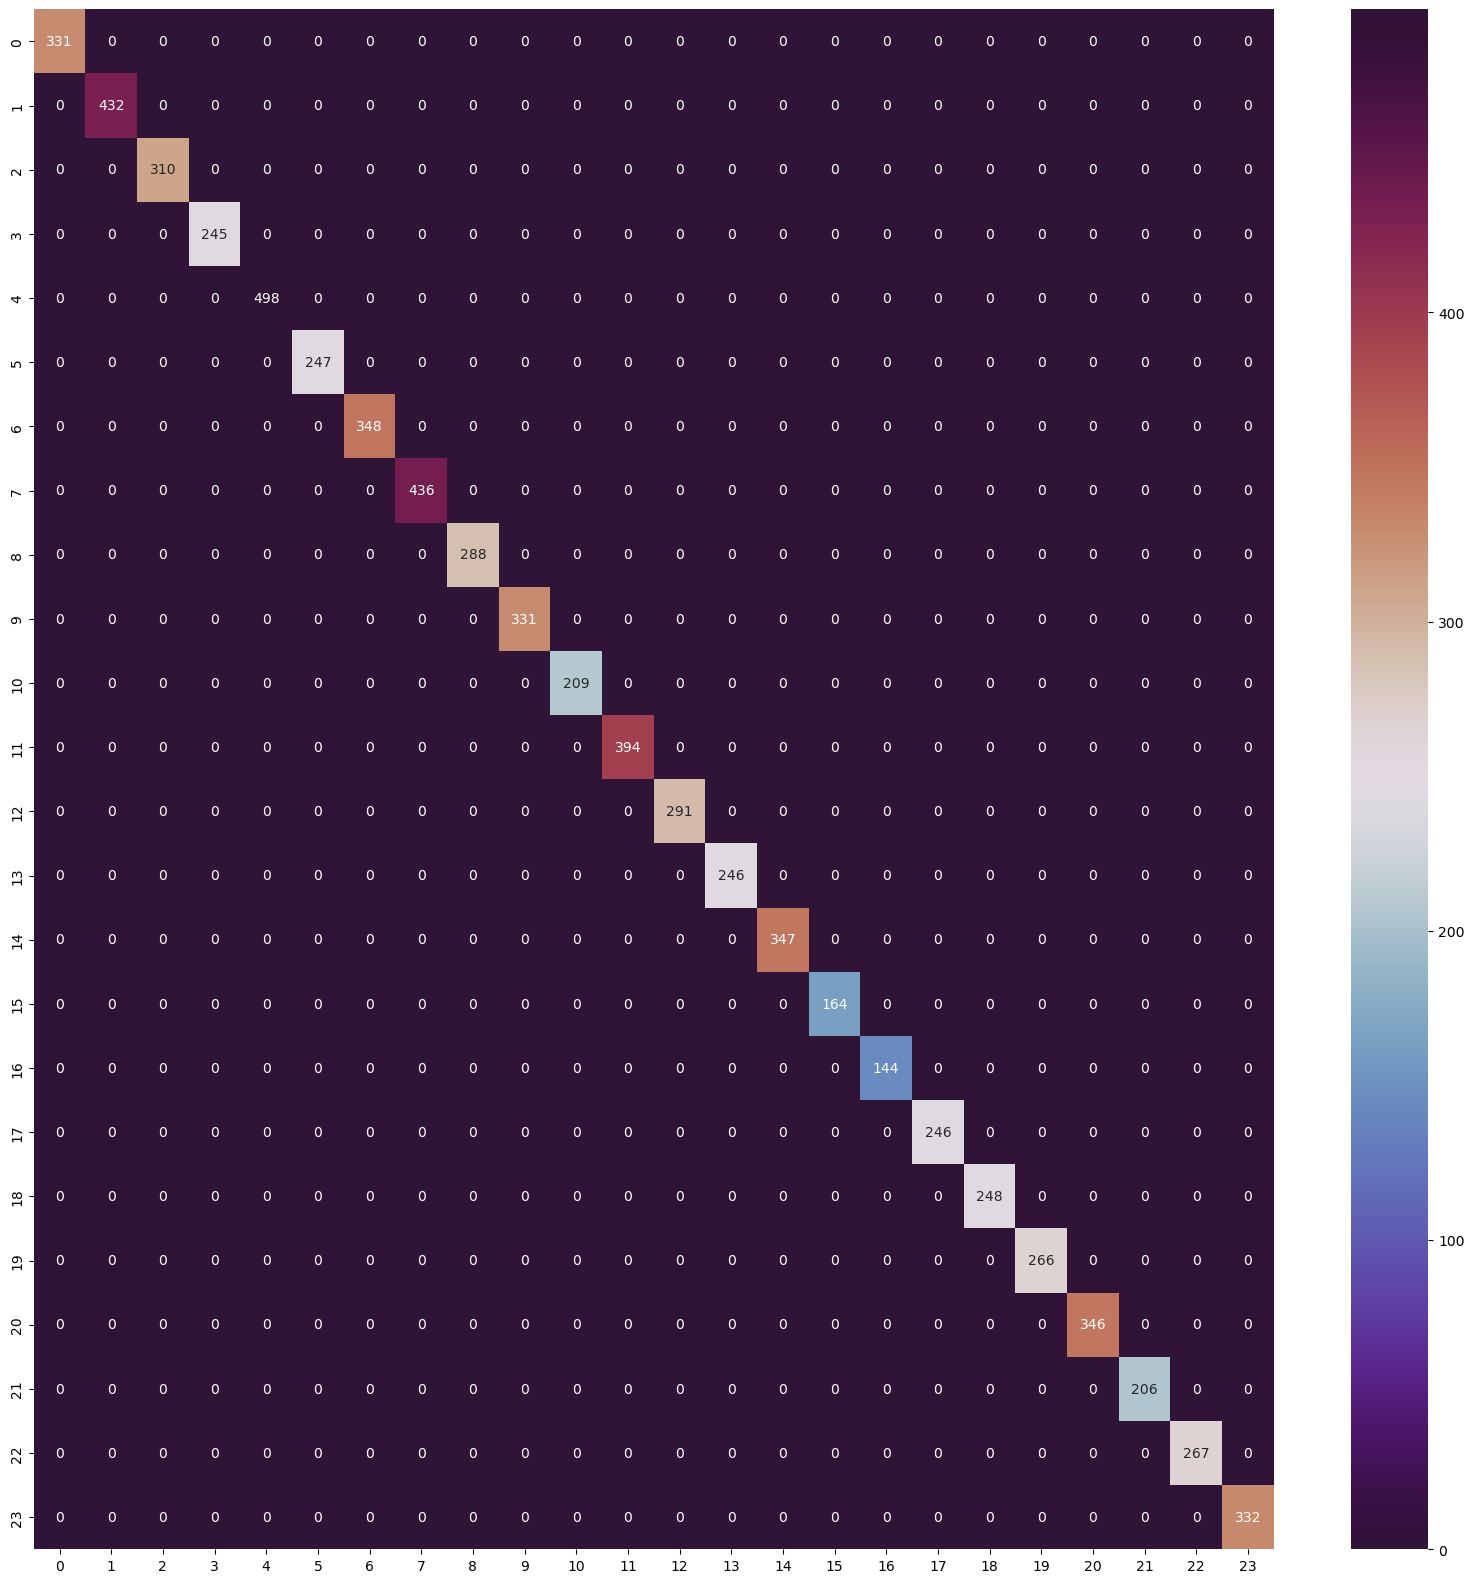

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,cmap='twilight_shifted',fmt='g')